# Credit EDA & Credit Score Calculation with Python

## Problem statement:


To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

# Imports

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [126]:
credit_score_data = pd.read_csv(
    "/Users/indraneeldutta/Documents/Scaler/Fintech Domain/Credit Scoring and EDA/data/Credit Score.csv"
)

/var/folders/5m/6v9nlkzx2rn5rdpsrw41z6880000gq/T/ipykernel_59944/2426982786.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_score_data = pd.read_csv(


In [127]:
credit_score_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979


# EDA

In [128]:
#Display basic information about the dataset
credit_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [129]:
# Display basic statistics
credit_score_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [130]:
# Check for missing values
credit_score_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

#### Month

In [131]:
credit_score_data["Month"].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

#### Name

In [132]:
credit_score_data["Name"].value_counts()

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

#### Age

In [133]:
credit_score_data["Age"].describe()

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

In [134]:
credit_score_data["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [135]:
# remove tailing '_'
credit_score_data["Age"] = credit_score_data["Age"].str.replace("_", "")

# remove '-'
credit_score_data["Age"] = credit_score_data["Age"].str.replace("-", "")

In [136]:
credit_score_data["Age"] = credit_score_data["Age"].astype(int)

In [137]:
print(f"Min Age: {min(credit_score_data['Age'])}, Max Age: {max(credit_score_data['Age'])}")

Min Age: 14, Max Age: 8698


In [138]:
# replace Age >100 or Age <18 with the median age
median_age = credit_score_data[(credit_score_data['Age'] >= 18) & (credit_score_data['Age'] <= 100)]['Age'].median()
credit_score_data["Age"] = credit_score_data["Age"].apply(lambda x: median_age if x < 18 or x > 100 else x)

print(f"Min Age: {min(credit_score_data['Age'])}, Max Age: {max(credit_score_data['Age'])}")

Min Age: 18.0, Max Age: 100.0


#### SSN

We do not need the SSN column, so let's just drop it

In [139]:
#  drop SSN column
credit_score_data = credit_score_data.drop("SSN", axis=1)

In [140]:
credit_score_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#### Occupation

In [141]:
credit_score_data["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [142]:
# replace '_______' with the Occupation based on the Customer ID
occupation_mode = credit_score_data.groupby("Customer_ID")["Occupation"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"
)
credit_score_data["Occupation"] = credit_score_data.apply(
    lambda row: (
        occupation_mode[row["Customer_ID"]] if row["Occupation"] == '_______' else row["Occupation"]
    ),
    axis=1,
)

In [143]:
credit_score_data["Occupation"].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

In [144]:
credit_score_data[credit_score_data["Occupation"] == "_______"]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
93280,0x23892,CUS_0x9e67,January,Marias,24.0,_______,44393.86,3504.488333,6,3,...,NaN,_,1270.97,37.328326,NaN,Yes,63.794335,91.4704338,High_spent_Medium_value_payments,445.1840641
93282,0x23894,CUS_0x9e67,March,Marias,24.0,_______,44393.86_,3504.488333,6,3,...,3.0,_,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.10076083,High_spent_Medium_value_payments,463.553737
93283,0x23895,CUS_0x9e67,April,Marias,24.0,_______,44393.86,3504.488333,6,3,...,3.0,_,1270.97,27.476836,NaN,Yes,63.794335,218.849479,Low_spent_Small_value_payments,357.8050189
93284,0x23896,CUS_0x9e67,May,NaN,24.0,_______,44393.86,3504.488333,6,3,...,3.0,Standard,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.9647887,Low_spent_Large_value_payments,426.6897091
93286,0x23898,CUS_0x9e67,July,Marias,24.0,_______,44393.86,3504.488333,6,3,...,3.0,Standard,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.1717288,Low_spent_Small_value_payments,146.4827691


Let's Replace '_______' with 'Unknown'

In [145]:
credit_score_data["Occupation"] = credit_score_data["Occupation"].str.replace(
    "_______", "Unknown"
)

In [146]:
credit_score_data["Occupation"].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Unknown             5
Name: count, dtype: int64

#### Annual Income

In [147]:
credit_score_data["Annual_Income"].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: count, Length: 18940, dtype: int64

Let's replace the tailing '_' with ""

In [148]:
credit_score_data["Annual_Income"] = credit_score_data["Annual_Income"].str.replace(
    "_", ""
)

In [149]:
credit_score_data["Annual_Income"].value_counts()

Annual_Income
22434.16              16
20867.67              16
40341.16              16
109945.32             16
17273.83              16
                      ..
14187917               1
13363794               1
124900.86000000002     1
56400.18000000001      1
20001329               1
Name: count, Length: 13701, dtype: int64

#### Monthly_Inhand_Salary

In [150]:
credit_score_data["Monthly_Inhand_Salary"].value_counts()

Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64

#### Num_Bank_Accounts

In [151]:
credit_score_data["Num_Bank_Accounts"].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [152]:
credit_score_data["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [153]:
credit_score_data[credit_score_data["Num_Bank_Accounts"]>10]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
267,0x1791,CUS_0x4004,April,Carlosj,44.0,Writer,58317,NaN,1414,5,...,10.0,Standard,98.97,29.766107,NaN,Yes,149.897199,158.648276,High_spent_Medium_value_payments,407.9295246
288,0x17b2,CUS_0x4080,January,ra Alperx,34.0,Mechanic,29469.98,2227.831667,1231,7,...,11.0,_,3421.66,24.639658,NaN,Yes,69.685459,59.82559612,!@9#%8,363.272112
310,0x17d0,CUS_0x42ac,July,Lawrencea,37.0,Musician,15566.02,1423.168333,67,5,...,9.0,Standard,1693.95,29.706454,8 Years and 4 Months,Yes,43.070520,80.4844201,!@9#%8,308.7618936
339,0x17fd,CUS_0x9bc1,April,Jaisinghanij,42.0,Architect,20574.47,NaN,572,3,...,11.0,Standard,749.95,36.559538,11 Years and 2 Months,Yes,49.348666,25.16140443,High_spent_Medium_value_payments,349.5438459
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19.0,Musician,85554.03,7185.502500,1488,2,...,3.0,_,1095.73,41.661802,19 Years and 11 Months,No,0.000000,70.82263262,High_spent_Large_value_payments,887.7276174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99591,0x25d89,CUS_0x544,August,Jon Herskovitzu,29.0,Mechanic,17013.29,1326.774167,813,1,...,3.0,_,1452.79,28.051684,32 Years and 6 Months,NM,13.109663,55.72695329,Low_spent_Small_value_payments,353.840801
99638,0x25dd0,CUS_0x296f,July,David Millikenh,25.0,Developer,125271.96,10374.330000,1481,7,...,7.0,Good,827.56,33.201730,25 Years and 8 Months,NM,241.065885,180.5600146,!@9#%8,855.8071
99666,0x25dfc,CUS_0xb09,March,Lianau,31.0,Lawyer,146310.68,12124.556670,474,4,...,1.0,Good,928.28,43.274889,22 Years and 3 Months,No,72.250125,121.284825,High_spent_Large_value_payments,1258.920717
99722,0x25e50,CUS_0x11c7,March,raden Reddallh,53.0,Architect,36817.94,3198.161667,697,4,...,2.0,Good,1019.46,26.578799,16 Years and 9 Months,No,86.809918,123.9155591,Low_spent_Small_value_payments,399.09069


Since there are a lot of outliers, we will use the mode of number of bank accounts to replace the outliers.


In [154]:
# Calculate the mode of Num_Bank_Accounts for each Customer_ID
num_bank_accounts_mode = credit_score_data.groupby("Customer_ID")[
    "Num_Bank_Accounts"
].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Replace any value more than the mode with the mode
credit_score_data["Num_Bank_Accounts"] = credit_score_data.apply(
    lambda row: (
        num_bank_accounts_mode[row["Customer_ID"]]
        if row["Num_Bank_Accounts"] > num_bank_accounts_mode[row["Customer_ID"]]
        else row["Num_Bank_Accounts"]
    ),
    axis=1,
)

In [155]:
credit_score_data["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
 6     13189
 7     12976
 8     12922
 4     12401
 5     12266
 3     12095
 9      5494
 10     5321
 1      4547
 0      4396
 2      4361
-1        32
Name: count, dtype: int64

We still have number of bank account as -1 for some customers

In [156]:
credit_score_data[credit_score_data["Num_Bank_Accounts"] == -1]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
30328,0xc7b6,CUS_0x4f2a,January,Margaretf,39.0,Engineer,128305.76,10434.146670,-1,7,...,2.0,Good,1151.7,28.555646,22 Years and 3 Months,No,196.587321,268.7720818,High_spent_Medium_value_payments,828.0552637
30329,0xc7b7,CUS_0x4f2a,February,Margaretf,39.0,Engineer,128305.76,10434.146670,-1,7,...,2.0,Good,1151.7,30.343064,22 Years and 4 Months,No,196.587321,588.7732847,Low_spent_Small_value_payments,548.0540608
30330,0xc7b8,CUS_0x4f2a,March,Margaretf,39.0,Engineer,128305.76,10434.146670,-1,6,...,6.0,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857,High_spent_Large_value_payments,855.9049598
30331,0xc7b9,CUS_0x4f2a,April,Margaretf,40.0,Engineer,128305.76,NaN,-1,6,...,6.0,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.3044178,Low_spent_Large_value_payments,592.5229277
30332,0xc7ba,CUS_0x4f2a,May,Margaretf,40.0,Engineer,128305.76,10434.146670,-1,6,...,6.0,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966754,High_spent_Large_value_payments,936.7306701
30333,0xc7bb,CUS_0x4f2a,June,Margaretf,40.0,Engineer,128305.76,10434.146670,-1,6,...,6.0,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.1292765
30334,0xc7bc,CUS_0x4f2a,July,Margaretf,40.0,Engineer,128305.76,10434.146670,-1,6,...,6.0,Good,1151.7,35.206427,NaN,No,42850.000000,172.9920212,High_spent_Large_value_payments,913.8353243
30335,0xc7bd,CUS_0x4f2a,August,Margaretf,40.0,Engineer,22136920,NaN,-1,6,...,6.0,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.6723032,High_spent_Medium_value_payments,758.1550423
43688,0x115fe,CUS_0xa878,January,NaN,54.0,Engineer,117851.07,9870.922500,-1,7,...,1.0,_,607.78,31.531889,20 Years and 5 Months,No,0.000000,394.2919201,High_spent_Medium_value_payments,842.8003299
43689,0x115ff,CUS_0xa878,February,Douwe Miedemaz,54.0,Engineer,117851.07,9870.922500,-1,6,...,1.0,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.1444537,!@9#%8,588.9477963


Let's replace them with 1

In [157]:
credit_score_data["Num_Bank_Accounts"] = credit_score_data[
    "Num_Bank_Accounts"
].replace(-1.0, 1.0)

In [158]:
credit_score_data["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6     13189
7     12976
8     12922
4     12401
5     12266
3     12095
9      5494
10     5321
1      4579
0      4396
2      4361
Name: count, dtype: int64

In [159]:
credit_score_data[credit_score_data["Num_Bank_Accounts"] == 0]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
48,0x164a,CUS_0x284a,January,Nadiaq,33.0,Lawyer,131313.4,11242.783330,0,1,...,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535,High_spent_Medium_value_payments,858.4624744
49,0x164b,CUS_0x284a,February,Nadiaq,34.0,Lawyer,131313.4,11242.783330,0,1,...,4.0,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707,High_spent_Small_value_payments,547.7604572
50,0x164c,CUS_0x284a,March,Nadiaq,34.0,Lawyer,131313.4,10469.207760,0,1,...,4.0,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.0643211,High_spent_Large_value_payments,1038.569407
51,0x164d,CUS_0x284a,April,Nadiaq,34.0,Lawyer,131313.4,10469.207760,0,1,...,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.4349563,High_spent_Medium_value_payments,899.1987716
52,0x164e,CUS_0x284a,May,Nadiaq,34.0,Lawyer,131313.4,10469.207760,0,1,...,4.0,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089,High_spent_Large_value_payments,963.254819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,34.0,Lawyer,42903.79,NaN,0,4,...,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391927,High_spent_Large_value_payments,520.662207
99964,0x25fba,CUS_0x372c,May,NaN,18.0,Lawyer,42903.79,3468.315833,0,4,...,1.0,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460934,Low_spent_Small_value_payments,151.210033
99965,0x25fbb,CUS_0x372c,June,NaN,19.0,Lawyer,42903.79,3468.315833,0,4,...,1.0,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686,Low_spent_Large_value_payments,394.500158
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19.0,Lawyer,42903.79,3468.315833,0,4,...,1.0,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.8737981,Low_spent_Medium_value_payments,350.982329


Let's Handle this anomaly- where some Customer's have 0 Bank Accounts

In [160]:
# Create a mask for customers with 0 bank accounts but at least 1 credit card
mask = (credit_score_data["Num_Bank_Accounts"] == 0) & (
    credit_score_data["Num_Credit_Card"] >= 1
)

# Update Num_Bank_Accounts to 1 for these customers
credit_score_data.loc[mask, "Num_Bank_Accounts"] = 1

In [161]:
credit_score_data[credit_score_data["Num_Bank_Accounts"] == 0]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


#### Num_Credit_Card

In [162]:
credit_score_data["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [163]:
credit_score_data["Num_Credit_Card"].value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

Similar to Num_Bank_Accounts. We will handle the anomalies the same way for Num_Credit_Card

In [164]:
# Calculate the mode of Num_Bank_Accounts for each Customer_ID
num_bank_accounts_mode = credit_score_data.groupby("Customer_ID")[
    "Num_Credit_Card"
].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Replace any value more than the mode with the mode
credit_score_data["Num_Credit_Card"] = credit_score_data.apply(
    lambda row: (
        num_bank_accounts_mode[row["Customer_ID"]]
        if row["Num_Credit_Card"] > num_bank_accounts_mode[row["Customer_ID"]]
        else row["Num_Credit_Card"]
    ),
    axis=1,
)

In [165]:
credit_score_data["Num_Credit_Card"].value_counts()

Num_Credit_Card
5     18900
7     16969
6     16949
4     14365
3     13588
8      5073
10     4955
9      4741
2      2224
1      2185
11       30
0        21
Name: count, dtype: int64

In [166]:
credit_score_data[credit_score_data["Num_Credit_Card"] == 0]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
4712,0x319e,CUS_0x7ce5,January,Singhj,23.0,Writer,101912.13,8503.677500,4,0,...,2.0,Good,152.6_,29.454223,19 Years and 11 Months,NM,0.000000,295.8766472,Low_spent_Medium_value_payments,834.4911028
4713,0x319f,CUS_0x7ce5,February,Singhj,23.0,Writer,101912.13,8503.677500,4,0,...,2.0,Good,152.6,42.143932,20 Years and 0 Months,No,0.000000,349.3415713,Low_spent_Medium_value_payments,781.0261787
4714,0x31a0,CUS_0x7ce5,March,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,2.0,_,152.6,27.336863,20 Years and 1 Months,No,0.000000,783.8010626,Low_spent_Large_value_payments,336.5666874
4715,0x31a1,CUS_0x7ce5,April,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,NaN,_,152.6,33.506761,20 Years and 2 Months,No,0.000000,90.13946918,High_spent_Large_value_payments,1000.228281
4716,0x31a2,CUS_0x7ce5,May,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,2.0,Good,152.6,36.707990,20 Years and 3 Months,No,0.000000,346.9351162,Low_spent_Large_value_payments,773.4326338
4717,0x31a3,CUS_0x7ce5,June,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,2.0,Good,152.6,36.928316,20 Years and 4 Months,No,0.000000,66.23205273,High_spent_Large_value_payments,1024.135697
4718,0x31a4,CUS_0x7ce5,July,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,1351.0,Good,152.6,26.630283,20 Years and 5 Months,NM,0.000000,287.4291681,Low_spent_Medium_value_payments,842.9385819
4719,0x31a5,CUS_0x7ce5,August,Singhj,24.0,Writer,101912.13,8503.677500,4,0,...,2.0,_,152.6,42.515861,20 Years and 6 Months,No,0.000000,411.2736672,!@9#%8,719.0940828
9278,0x4c5c,CUS_0x73c2,July,Bartuneks,23.0,Mechanic,116721.18,9552.765000,1,0,...,3.0,Good,48.88,41.498049,22 Years and 9 Months,NM,82.914222,410.2297823,High_spent_Small_value_payments,722.132496
9279,0x4c5d,CUS_0x73c2,August,Bartuneks,34.0,Mechanic,116721.18,9552.765000,1,0,...,3.0,Good,48.88,33.270882,22 Years and 10 Months,No,82.914222,241.9468818,High_spent_Medium_value_payments,880.4153965


In [167]:
# Create a mask for customers with 0 bank accounts but at least 1 credit card
mask = (credit_score_data["Num_Credit_Card"] == 0) & (
    credit_score_data["Interest_Rate"] >= 1
)

# Update Num_Bank_Accounts to 1 for these customers
credit_score_data.loc[mask, "Num_Credit_Card"] = 1

In [168]:
credit_score_data["Num_Credit_Card"].value_counts()

Num_Credit_Card
5     18900
7     16969
6     16949
4     14365
3     13588
8      5073
10     4955
9      4741
2      2224
1      2206
11       30
Name: count, dtype: int64

#### Interest_Rate

In [169]:
credit_score_data["Interest_Rate"].value_counts()

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

We handle the outliers for Interest_Rate Similar to that of Num_Credit_Card and Num_Bank_Accounts

In [170]:
# Calculate the mode of Num_Bank_Accounts for each Customer_ID
num_bank_accounts_mode = credit_score_data.groupby("Customer_ID")["Interest_Rate"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Replace any value more than the mode with the mode
credit_score_data["Interest_Rate"] = credit_score_data.apply(
    lambda row: (
        num_bank_accounts_mode[row["Customer_ID"]]
        if row["Interest_Rate"] > num_bank_accounts_mode[row["Customer_ID"]]
        else row["Interest_Rate"]
    ),
    axis=1,
)

In [171]:
credit_score_data["Interest_Rate"].value_counts()

Interest_Rate
8     5104
5     5096
6     4832
12    4648
10    4616
7     4584
9     4576
11    4512
18    4192
15    4072
20    4008
17    3888
16    3800
19    3704
3     2824
1     2744
4     2640
2     2520
13    2432
14    2272
32    1776
22    1752
24    1736
30    1728
23    1720
29    1696
28    1648
27    1640
25    1608
21    1592
34    1528
26    1528
33    1496
31    1488
Name: count, dtype: int64

#### Num_of_Loan

In [172]:
credit_score_data["Num_of_Loan"].describe()

count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object

In [173]:
credit_score_data["Num_of_Loan"].value_counts()

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

Let's Clean the data a bit

In [174]:
credit_score_data["Num_of_Loan"] = credit_score_data["Num_of_Loan"].str.replace("_", "")

In [175]:
credit_score_data["Num_of_Loan"] = credit_score_data["Num_of_Loan"].str.replace("-", "")

In [176]:
credit_score_data["Num_of_Loan"].value_counts()

Num_of_Loan
3       15104
2       15032
4       14743
0       10930
1       10606
        ...  
321         1
1439        1
663         1
613         1
966         1
Name: count, Length: 413, dtype: int64

Let's Handle the outliers

In [177]:
# Ensure Num_of_Loan is numeric
credit_score_data["Num_of_Loan"] = pd.to_numeric(
    credit_score_data["Num_of_Loan"], errors="coerce"
)

# Calculate the mean of Num_of_Loan for each Customer_ID
num_of_loans_mean = credit_score_data.groupby("Customer_ID")["Num_of_Loan"].mean()

# Replace any value more than the mean with the mean
credit_score_data["Num_of_Loan"] = credit_score_data.apply(
    lambda row: (
        num_of_loans_mean[row["Customer_ID"]]
        if row["Num_of_Loan"] > num_of_loans_mean[row["Customer_ID"]]
        else row["Num_of_Loan"]
    ),
    axis=1,
)

In [178]:
credit_score_data["Num_of_Loan"].value_counts()

Num_of_Loan
3.000      15104
2.000      15032
4.000      14743
0.000      10930
1.000      10606
           ...  
33.625         1
82.250         1
31.500         1
21.500         1
124.250        1
Name: count, Length: 423, dtype: int64

Type of loan

In [179]:
# Fill missing values with 'Unknown'
credit_score_data["Type_of_Loan"].fillna("Unknown", inplace=True)

# There are multiple loan types in one cell, split them 
credit_score_data["Type_of_Loan"] = credit_score_data["Type_of_Loan"].apply(
    lambda x: [item.strip() for item in x.split(",")] if "," in x else [x]
)

/var/folders/5m/6v9nlkzx2rn5rdpsrw41z6880000gq/T/ipykernel_59944/595640288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_score_data["Type_of_Loan"].fillna("Unknown", inplace=True)


In [180]:
credit_score_data["Type_of_Loan"]

0        [Auto Loan, Credit-Builder Loan, Personal Loan...
1        [Auto Loan, Credit-Builder Loan, Personal Loan...
2        [Auto Loan, Credit-Builder Loan, Personal Loan...
3        [Auto Loan, Credit-Builder Loan, Personal Loan...
4        [Auto Loan, Credit-Builder Loan, Personal Loan...
                               ...                        
99995                        [Auto Loan, and Student Loan]
99996                        [Auto Loan, and Student Loan]
99997                        [Auto Loan, and Student Loan]
99998                        [Auto Loan, and Student Loan]
99999                        [Auto Loan, and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

#### Delay_from_due_date

In [181]:
# Convert the column to integer type, handling any non-numeric values
credit_score_data["Delay_from_due_date"] = pd.to_numeric(
    credit_score_data["Delay_from_due_date"], errors="coerce"
)

# If there are any missing values (although there currently are none), fill with the median
credit_score_data["Delay_from_due_date"].fillna(
    credit_score_data["Delay_from_due_date"].median(), inplace=True
)

/var/folders/5m/6v9nlkzx2rn5rdpsrw41z6880000gq/T/ipykernel_59944/1790097708.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_score_data["Delay_from_due_date"].fillna(


#### Num_of_Delayed_Payment

In [182]:
credit_score_data["Num_of_Delayed_Payment"] = credit_score_data[
    "Num_of_Delayed_Payment"
].str.replace("_", "")

In [183]:
# Ensure Num_of_Loan is numeric
credit_score_data["Num_of_Delayed_Payment"] = pd.to_numeric(
    credit_score_data["Num_of_Delayed_Payment"], errors="coerce"
)

# Calculate the mean of Num_of_Loan for each Customer_ID
num_of_delayed_payments_mean = credit_score_data.groupby("Customer_ID")[
    "Num_of_Delayed_Payment"
].mean()

# Replace any value more than the mean with the mean
credit_score_data["Num_of_Delayed_Payment"] = credit_score_data.apply(
    lambda row: (
        num_of_delayed_payments_mean[row["Customer_ID"]]
        if row["Num_of_Delayed_Payment"]
        > num_of_delayed_payments_mean[row["Customer_ID"]]
        else row["Num_of_Delayed_Payment"]
    ),
    axis=1,
)

In [184]:
credit_score_data[credit_score_data["Num_of_Delayed_Payment"].isna()][
    "Num_of_Delayed_Payment"
]

1       NaN
4       NaN
30      NaN
32      NaN
33      NaN
         ..
99973   NaN
99974   NaN
99992   NaN
99993   NaN
99998   NaN
Name: Num_of_Delayed_Payment, Length: 7002, dtype: float64

In [185]:
# Calculate the mean of Num_of_Delayed_Payment for each Customer_ID
num_of_delayed_payments_mean = credit_score_data.groupby("Customer_ID")[
    "Num_of_Delayed_Payment"
].mean()

# Replace NaN values with the mean
credit_score_data["Num_of_Delayed_Payment"] = credit_score_data.apply(
    lambda row: (
        num_of_delayed_payments_mean[row["Customer_ID"]]
        if pd.isna(row["Num_of_Delayed_Payment"])
        else row["Num_of_Delayed_Payment"]
    ),
    axis=1,
)

In [186]:
credit_score_data["Num_of_Delayed_Payment"]

0        6.000000
1        5.333333
2        6.000000
3        4.000000
4        5.333333
           ...   
99995    6.400000
99996    6.400000
99997    6.000000
99998    6.160000
99999    6.000000
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

#### Changed_Credit_Limit

In [187]:
credit_score_data["Changed_Credit_Limit"] = credit_score_data[
    "Changed_Credit_Limit"
].replace("_", np.nan)

# Convert the column to numeric, which will turn invalid entries into NaN
credit_score_data["Changed_Credit_Limit"] = pd.to_numeric(
    credit_score_data["Changed_Credit_Limit"], errors="coerce"
)

# Calculate the mean of 'Changed_Credit_Limit' grouped by 'Customer_ID'
grouped_mean = credit_score_data.groupby("Customer_ID")[
    "Changed_Credit_Limit"
].transform("mean")

# Replace NaN values with the grouped mean
credit_score_data["Changed_Credit_Limit"].fillna(grouped_mean, inplace=True)

/var/folders/5m/6v9nlkzx2rn5rdpsrw41z6880000gq/T/ipykernel_59944/4050271205.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_score_data["Changed_Credit_Limit"].fillna(grouped_mean, inplace=True)


In [188]:
credit_score_data["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
8.220000     136
11.500000    127
11.320000    126
7.350000     121
10.060000    121
            ... 
9.457143       1
24.560000      1
18.472857      1
3.225714       1
17.558571      1
Name: count, Length: 4974, dtype: int64

#### Num_Credit_Inquiries

In [189]:
credit_score_data["Num_Credit_Inquiries"] = credit_score_data[
    "Num_Credit_Inquiries"
].replace("_", np.nan)

# Convert the column to numeric, which will turn invalid entries into NaN
credit_score_data["Num_Credit_Inquiries"] = pd.to_numeric(
    credit_score_data["Num_Credit_Inquiries"], errors="coerce"
)

# Calculate the mean of 'Num_Credit_Inquiries' grouped by 'Customer_ID'
grouped_mean = credit_score_data.groupby("Customer_ID")[
    "Num_Credit_Inquiries"
].transform("mean")

# Replace NaN values with the grouped mean
credit_score_data["Num_Credit_Inquiries"].fillna(grouped_mean, inplace=True)

/var/folders/5m/6v9nlkzx2rn5rdpsrw41z6880000gq/T/ipykernel_59944/3883386527.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_score_data["Num_Credit_Inquiries"].fillna(grouped_mean, inplace=True)


In [190]:
credit_score_data["Num_Credit_Inquiries"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

#### Credit_Mix

In [191]:
credit_score_data["Credit_Mix"] = credit_score_data[
    "Credit_Mix"
].replace("_", np.nan)

# Calculate the mode of 'Credit_Mix' grouped by 'Customer_ID'
grouped_mode = credit_score_data.groupby("Customer_ID")[
    "Credit_Mix"
].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Replace NaN values with the grouped mode
credit_score_data["Credit_Mix"] = credit_score_data.apply(
    lambda row: (
        grouped_mode[row["Customer_ID"]] if pd.isnull(row["Credit_Mix"]) else row["Credit_Mix"]
    ),
    axis=1,
)

In [192]:
credit_score_data["Credit_Mix"].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

#### Credit_History_Age

In [193]:
def convert_to_years(age_str):
    if pd.isnull(age_str):
        return np.nan
    years, months = 0, 0
    age_str = age_str.lower().replace('years', 'year').replace('months', 'month')
    if 'year' in age_str:
        years = int(age_str.split(' year')[0].strip())
    if 'month' in age_str:
        months = int(age_str.split(' and ')[-1].split(' month')[0].strip())
    return years + months / 12

credit_score_data['Credit_History_Age'] = credit_score_data['Credit_History_Age'].apply(convert_to_years)



In [194]:
credit_score_data["Credit_History_Age"]

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

#### Payment_of_Min_Amount

In [195]:
credit_score_data["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

#### Amount_invested_monthly

In [196]:
credit_score_data["Amount_invested_monthly"]

0        80.41529544
1        118.2802216
2        81.69952126
3        199.4580744
4        41.42015309
            ...     
99995    60.97133256
99996    54.18595029
99997    24.02847745
99998    251.6725822
99999    167.1638652
Name: Amount_invested_monthly, Length: 100000, dtype: object

In [197]:
credit_score_data["Amount_invested_monthly"] = credit_score_data[
    "Amount_invested_monthly"
].str.replace("__","")

In [198]:
credit_score_data["Amount_invested_monthly"] = credit_score_data["Amount_invested_monthly"].astype(float)

In [199]:
credit_score_data["Amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

#### Payment_Behaviour

In [200]:
credit_score_data["Payment_Behaviour"]

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 100000, dtype: object

In [201]:
# Fill 'Payment_Behaviour' with the mode of payment behavior grouped by 'Customer_ID'
payment_behaviour_mode = credit_score_data.groupby("Customer_ID")["Payment_Behaviour"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"
)
credit_score_data["Payment_Behaviour"] = credit_score_data.apply(
    lambda row: (
        payment_behaviour_mode[row["Customer_ID"]] if row["Payment_Behaviour"] != payment_behaviour_mode[row["Customer_ID"]] else row["Payment_Behaviour"]
    ),
    axis=1,
)


#### Monthly_Balance

In [202]:
credit_score_data['Monthly_Balance']

0        312.4940887
1        284.6291625
2        331.2098629
3        223.4513097
4         341.489231
            ...     
99995     479.866228
99996      496.65161
99997     516.809083
99998     319.164979
99999     393.673696
Name: Monthly_Balance, Length: 100000, dtype: object

In [203]:
credit_score_data["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
312.4940887                         1
604.3402009                         1
                                   ..
280.6862317                         1
366.289038                          1
151.1882696                         1
306.7502785                         1
393.673696                          1
Name: count, Length: 98790, dtype: int64

In [204]:
credit_score_data["Monthly_Balance"] = credit_score_data["Monthly_Balance"].str.replace("__", "")

In [205]:
credit_score_data["Monthly_Balance"] = credit_score_data["Monthly_Balance"].str.replace(
    "-", ""
)

In [206]:
credit_score_data["Monthly_Balance"].value_counts()

Monthly_Balance
333333333333333333333333333    9
695.0571561                    2
350.0148691                    2
312.4940887                    1
268.5232336                    1
                              ..
315.1430496                    1
348.8652669                    1
329.7982496                    1
218.6369286                    1
214.6149336                    1
Name: count, Length: 97122, dtype: int64

In [207]:
# Fill 'Monthly_Balance' with the mean of monthly balance grouped by 'Customer_ID'
credit_score_data["Monthly_Balance"] = pd.to_numeric(credit_score_data["Monthly_Balance"], errors='coerce')
monthly_balance_mean = credit_score_data.groupby("Customer_ID")["Monthly_Balance"].transform('mean')
credit_score_data["Monthly_Balance"] = credit_score_data["Monthly_Balance"].fillna(monthly_balance_mean)

In [208]:
credit_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null  in

In [209]:
credit_score_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1696
dtype: int64

### Handle Missing Values

In [210]:
credit_score_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1696
dtype: int64

#### Name

In [211]:
# Fill 'Name' with the mode of names grouped by 'Customer_ID'
name_mode = credit_score_data.groupby("Customer_ID")["Name"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"
)
credit_score_data["Name"] = credit_score_data.apply(
    lambda row: (
        name_mode[row["Customer_ID"]] if pd.isnull(row["Name"]) else row["Name"]
    ),
    axis=1,
)

#### Monthly_Inhand_Salary

In [212]:
# Fill 'Monthly_Inhand_Salary' with the median salary grouped by 'Customer_ID'
salary_median = credit_score_data.groupby("Customer_ID")[
    "Monthly_Inhand_Salary"
].median()
credit_score_data["Monthly_Inhand_Salary"] = credit_score_data.apply(
    lambda row: (
        salary_median[row["Customer_ID"]]
        if pd.isnull(row["Monthly_Inhand_Salary"])
        else row["Monthly_Inhand_Salary"]
    ),
    axis=1,
)

#### Credit_History_Age

In [213]:
credit_score_data["Credit_History_Age"]

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [214]:
# Fill 'Monthly_Inhand_Salary' with the median salary grouped by 'Customer_ID'
credit_history_age_mean = credit_score_data.groupby("Customer_ID")[
    "Credit_History_Age"
].mean()
credit_score_data["Credit_History_Age"] = credit_score_data.apply(
    lambda row: (
        credit_history_age_mean[row["Customer_ID"]]
        if pd.isnull(row["Credit_History_Age"])
        else row["Credit_History_Age"]
    ),
    axis=1,
)

In [215]:
credit_score_data["Credit_History_Age"].isna().sum()

np.int64(0)

#### Amount_invested_monthly

In [216]:
credit_score_data["Amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

In [217]:
# Fill 'Monthly_Inhand_Salary' with the median salary grouped by 'Customer_ID'
amount_invested_monthly_mean = credit_score_data.groupby("Customer_ID")[
    "Amount_invested_monthly"
].mean()
credit_score_data["Amount_invested_monthly"] = credit_score_data.apply(
    lambda row: (
        amount_invested_monthly_mean[row["Customer_ID"]]
        if pd.isnull(row["Amount_invested_monthly"])
        else row["Amount_invested_monthly"]
    ),
    axis=1,
)

In [218]:
credit_score_data["Amount_invested_monthly"].isna().sum()

np.int64(0)

#### Monthly_Balance

In [219]:
credit_score_data["Monthly_Balance"]

0        312.494089
1        284.629163
2        331.209863
3        223.451310
4        341.489231
            ...    
99995           NaN
99996           NaN
99997           NaN
99998           NaN
99999           NaN
Name: Monthly_Balance, Length: 100000, dtype: float64

In [220]:
credit_score_data["Monthly_Balance"].fillna(0.0, inplace=True)

In [221]:
# Fill 'Monthly_Inhand_Salary' with the median salary grouped by 'Customer_ID'
monthly_balance_mean = credit_score_data.groupby("Customer_ID")[
    "Monthly_Balance"
].mean()
credit_score_data["Monthly_Balance"] = credit_score_data.apply(
    lambda row: (
        monthly_balance_mean[row["Customer_ID"]]
        if row["Monthly_Balance"] == 0.0
        else row["Monthly_Balance"]
    ),
    axis=1,
)

In [222]:
credit_score_data["Monthly_Balance"].isna().sum()

np.int64(0)

#

In [223]:
credit_score_data

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,31.944960,22.361111,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,34.0,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,3.0,Good,502.38,34.663572,31.500000,No,35.104023,60.971333,High_spent_Large_value_payments,0.000000
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,3.0,Good,502.38,40.565631,31.583333,No,35.104023,54.185950,High_spent_Large_value_payments,0.000000
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,3.0,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High_spent_Large_value_payments,0.000000
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,3.0,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,High_spent_Large_value_payments,0.000000


In [224]:
credit_score_data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

# Data Type

In [225]:
credit_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null  in

In [226]:
credit_score_data["Month"] = pd.to_datetime(
    credit_score_data["Month"], format="%B"
).dt.month

In [227]:
credit_score_data["Month"]

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int32

In [244]:
credit_score_data["Annual_Income"] = pd.to_numeric(
    credit_score_data["Annual_Income"], errors="coerce"
)

# Data Distribution

1. Distribution of Age

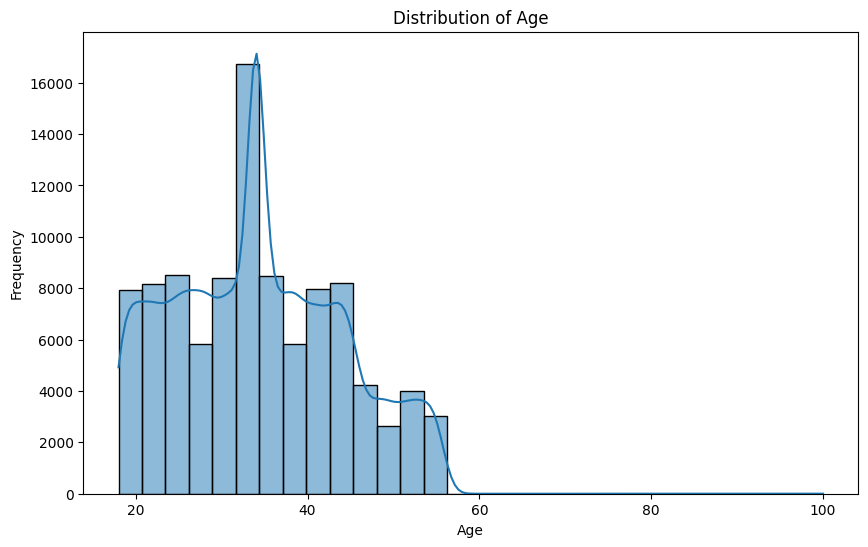

In [245]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(credit_score_data["Age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

2. Distribution of Annual Income

In [247]:
credit_score_data["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

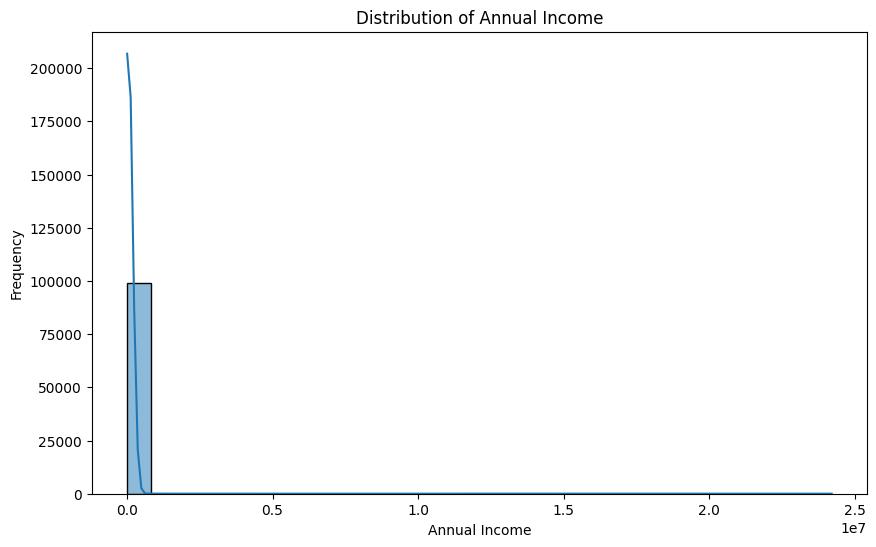

In [249]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(credit_score_data["Annual_Income"], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

3. Count of Occupations

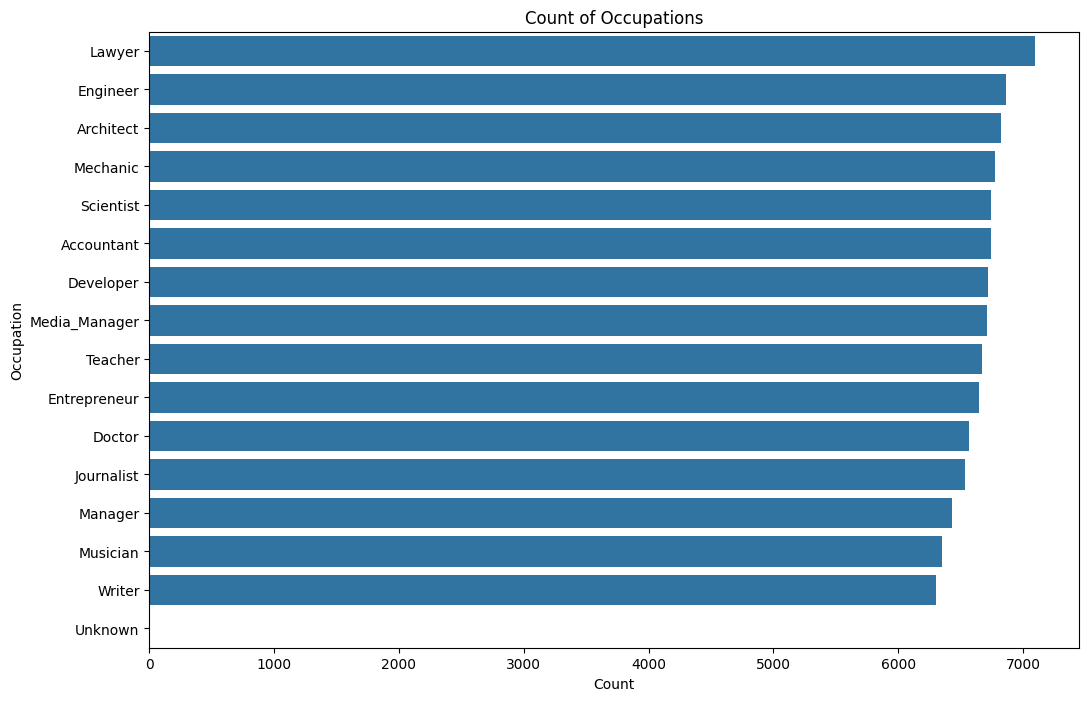

In [250]:
# Count of Occupations
plt.figure(figsize=(12, 8))
sns.countplot(
    y="Occupation",
    data=credit_score_data,
    order=credit_score_data["Occupation"].value_counts().index,
)
plt.title("Count of Occupations")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

4. Scatter Plot of Age vs. Annual Income

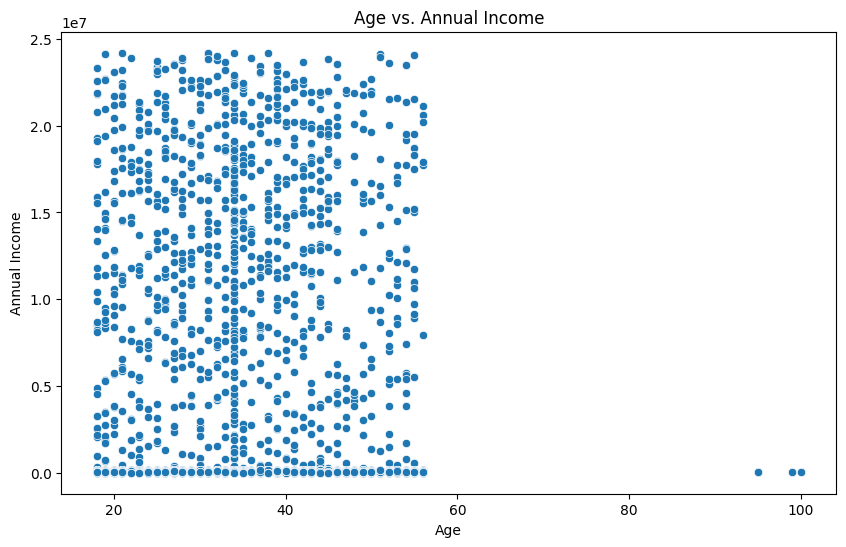

In [254]:
# Scatter Plot of Age vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Annual_Income", data=credit_score_data)
plt.title("Age vs. Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

#

#

# Credit Score Calculation

Let's create a custom FICO-like score, we'll consider the following factors, similar to how FICO scores are generally calculated:

Payment History (35%): This includes factors like the number of delayed payments and whether the customer has paid the minimum amount required.

Amounts Owed (30%): This includes outstanding debt and credit utilization ratio.

Length of Credit History (15%): This includes the age of the credit history.

Credit Mix (10%): This includes the number of loans, credit cards, and the variety of credit types.

New Credit (10%): This includes the number of recent credit inquiries.

#### Proposed Credit Score Calculation
1. Payment History (35%): A score based on Num_of_Delayed_Payment, Payment_of_Min_Amount, and Payment_Behaviour.
2. Amounts Owed (30%): A score based on Outstanding_Debt and Credit_Utilization_Ratio.
3. Length of Credit History (15%): A score derived from Credit_History_Age.
4. Credit Mix (10%): A score based on Num_of_Loan, Num_Credit_Card, and Credit_Mix.
5. New Credit (10%): A score based on Num_Credit_Inquiries.

In [232]:
# Function to calculate custom credit score
def calculate_credit_score(row):
    # Convert Payment_of_Min_Amount to numeric value
    payment_min_value = 1 if row["Payment_of_Min_Amount"] == "Yes" else 0

    # Convert Payment_Behaviour to numeric value
    payment_behaviour_score = {
        "Low_spent_Large_value_payments": 2,
        "High_spent_Large_value_payments": 1,
        "Low_spent_Small_value_payments": 4,
        "High_spent_Small_value_payments": 3,
        "Low_spent_Medium_value_payments": 5,
        "High_spent_Medium_value_payments": 6,
    }.get(row["Payment_Behaviour"], 0)

    # Payment History (35% of the score)
    payment_history_score = (
        (1 - row["Num_of_Delayed_Payment"] / 100) * 0.35
        + payment_min_value * 0.15
        + payment_behaviour_score * 0.5
    )

    # Amounts Owed (30% of the score)
    amounts_owed_score = (
        1 - row["Outstanding_Debt"] / (row["Annual_Income"] + 1e-9)
    ) * 0.7 + (1 - row["Credit_Utilization_Ratio"] / 100) * 0.3
    amounts_owed_score *= 0.30

    # Length of Credit History (15% of the score)
    credit_history_age_years = int(row["Credit_History_Age"])
    length_of_credit_history_score = (credit_history_age_years / 100) * 0.15

    # Credit Mix (10% of the score)
    credit_mix_score = 0.1 if row["Credit_Mix"] == "Good" else 0.05
    credit_mix_score += (row["Num_of_Loan"] + row["Num_Credit_Card"]) * 0.01
    credit_mix_score *= 0.10

    # New Credit (10% of the score)
    new_credit_score = (1 - row["Num_Credit_Inquiries"] / 10) * 0.10

    # Final credit score
    credit_score = (
        payment_history_score
        + amounts_owed_score
        + length_of_credit_history_score
        + credit_mix_score
        + new_credit_score
    )

    # Scale score to typical credit score range (300-850)
    final_credit_score = 300 + (credit_score * 550)

    return final_credit_score

In [233]:
# Convert relevant columns to numeric, handling any errors
credit_score_data["Num_of_Delayed_Payment"] = pd.to_numeric(
    credit_score_data["Num_of_Delayed_Payment"], errors="coerce"
)
credit_score_data["Outstanding_Debt"] = pd.to_numeric(
    credit_score_data["Outstanding_Debt"], errors="coerce"
)
credit_score_data["Credit_Utilization_Ratio"] = pd.to_numeric(
    credit_score_data["Credit_Utilization_Ratio"], errors="coerce"
)
credit_score_data["Num_of_Loan"] = pd.to_numeric(
    credit_score_data["Num_of_Loan"], errors="coerce"
)
credit_score_data["Num_Credit_Card"] = pd.to_numeric(
    credit_score_data["Num_Credit_Card"], errors="coerce"
)
credit_score_data["Num_Credit_Inquiries"] = pd.to_numeric(
    credit_score_data["Num_Credit_Inquiries"], errors="coerce"
)
credit_score_data["Annual_Income"] = pd.to_numeric(
    credit_score_data["Annual_Income"], errors="coerce"
)

# Apply the function to calculate the custom credit score
credit_score_data["Custom_Credit_Score"] = credit_score_data.apply(
    calculate_credit_score, axis=1
)

# Display the first few rows with the custom credit score
print(credit_score_data[["Customer_ID", "Custom_Credit_Score"]].head())

  Customer_ID  Custom_Credit_Score
0   CUS_0xd40          2338.828375
1   CUS_0xd40          2337.576150
2   CUS_0xd40          2337.943942
3   CUS_0xd40          2340.423530
4   CUS_0xd40          2341.114218


In [234]:
credit_score_data

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Custom_Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089,2338.828375
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.944960,22.361111,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629163,2337.576150
2,0x1604,CUS_0xd40,3,Aaron Maashoh,34.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863,2337.943942
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310,2340.423530
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2341.114218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,34.663572,31.500000,No,35.104023,60.971333,High_spent_Large_value_payments,0.000000,975.532329
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,40.565631,31.583333,No,35.104023,54.185950,High_spent_Large_value_payments,0.000000,972.610810
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High_spent_Large_value_payments,0.000000,973.039313
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,High_spent_Large_value_payments,0.000000,976.501884


In [235]:
max(credit_score_data['Custom_Credit_Score'])

2520.5013042192454

In [236]:
min(credit_score_data["Custom_Credit_Score"])

-13262.95117522905

Let's scale the score to a range of 300 to 850


Let's first normalise each value responsible for the calculation

In [237]:
def calculate_credit_score(row):
    # Convert Payment_of_Min_Amount to numeric value
    payment_min_value = 1 if row["Payment_of_Min_Amount"] == "Yes" else 0

    # Convert Payment_Behaviour to numeric value
    payment_behaviour_score = {
        "Low_spent_Large_value_payments": 2,
        "High_spent_Large_value_payments": 1,
        "Low_spent_Small_value_payments": 4,
        "High_spent_Small_value_payments": 3,
        "Low_spent_Medium_value_payments": 5,
        "High_spent_Medium_value_payments": 6,
    }.get(row["Payment_Behaviour"], 0)

    # Normalize and calculate each component
    # Payment History (35% of the score)
    payment_history_score = (
        1 - np.clip(row["Num_of_Delayed_Payment"] / 100, 0, 1)
    ) * 0.35
    payment_history_score += payment_min_value * 0.15
    payment_history_score += payment_behaviour_score / 6 * 0.5

    # Amounts Owed (30% of the score)
    amounts_owed_score = (
        1 - np.clip(row["Outstanding_Debt"] / (row["Annual_Income"] + 1e-9), 0, 1)
    ) * 0.7
    amounts_owed_score += (
        1 - np.clip(row["Credit_Utilization_Ratio"] / 100, 0, 1)
    ) * 0.3
    amounts_owed_score *= 0.30

    # Length of Credit History (15% of the score)
    try:
        credit_history_age_years = int(row["Credit_History_Age"].split()[0])
    except:
        credit_history_age_years = 0
    length_of_credit_history_score = np.clip(credit_history_age_years / 25, 0, 1) * 0.15

    # Credit Mix (10% of the score)
    credit_mix_score = 0.1 if row["Credit_Mix"] == "Good" else 0.05
    credit_mix_score += (
        np.clip((row["Num_of_Loan"] + row["Num_Credit_Card"]) / 10, 0, 1) * 0.01
    )
    credit_mix_score *= 0.10

    # New Credit (10% of the score)
    new_credit_score = (1 - np.clip(row["Num_Credit_Inquiries"] / 10, 0, 1)) * 0.10

    # Final credit score
    credit_score = (
        payment_history_score
        + amounts_owed_score
        + length_of_credit_history_score
        + credit_mix_score
        + new_credit_score
    )

    # Rescale the score to the FICO range (300-850)
    final_credit_score = 300 + (credit_score * 550)

    # Ensure the score is within 300 to 850
    return np.clip(final_credit_score, 300, 850)

In [238]:
# Convert relevant columns to numeric, handling any errors
credit_score_data["Num_of_Delayed_Payment"] = pd.to_numeric(
    credit_score_data["Num_of_Delayed_Payment"], errors="coerce"
)
credit_score_data["Outstanding_Debt"] = pd.to_numeric(
    credit_score_data["Outstanding_Debt"], errors="coerce"
)
credit_score_data["Credit_Utilization_Ratio"] = pd.to_numeric(
    credit_score_data["Credit_Utilization_Ratio"], errors="coerce"
)
credit_score_data["Num_of_Loan"] = pd.to_numeric(
    credit_score_data["Num_of_Loan"], errors="coerce"
)
credit_score_data["Num_Credit_Card"] = pd.to_numeric(
    credit_score_data["Num_Credit_Card"], errors="coerce"
)
credit_score_data["Num_Credit_Inquiries"] = pd.to_numeric(
    credit_score_data["Num_Credit_Inquiries"], errors="coerce"
)
credit_score_data["Annual_Income"] = pd.to_numeric(
    credit_score_data["Annual_Income"], errors="coerce"
)

# Apply the function to calculate the custom credit score
credit_score_data["Custom_Credit_Score"] = credit_score_data.apply(
    calculate_credit_score, axis=1
)

# Display the first few rows with the custom credit score
print(credit_score_data[["Customer_ID", "Custom_Credit_Score"]].head())

  Customer_ID  Custom_Credit_Score
0   CUS_0xd40                850.0
1   CUS_0xd40                850.0
2   CUS_0xd40                850.0
3   CUS_0xd40                850.0
4   CUS_0xd40                850.0


In [239]:
credit_score_data

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Custom_Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089,850.000000
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.944960,22.361111,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629163,850.000000
2,0x1604,CUS_0xd40,3,Aaron Maashoh,34.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863,850.000000
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310,850.000000
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,850.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,34.663572,31.500000,No,35.104023,60.971333,High_spent_Large_value_payments,0.000000,716.830662
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,40.565631,31.583333,No,35.104023,54.185950,High_spent_Large_value_payments,0.000000,713.909143
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High_spent_Large_value_payments,0.000000,714.337647
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,High_spent_Large_value_payments,0.000000,717.800217


In [240]:
max(credit_score_data["Custom_Credit_Score"])

850.0

In [241]:
min(credit_score_data["Custom_Credit_Score"])

443.53815606397484